In [2]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000)

model.fit(X_scaled, y)

feature_weights = model.coef_[0]

for i, weight in enumerate(feature_weights):
    print(f"Ознака {i+1}: {weight}")

num_features_to_select = 3
selected_feature_indices = np.argsort(np.abs(feature_weights))[::-1][:num_features_to_select]

print("Найважливіші ознаки:")
for index in selected_feature_indices:
    print(f"Ознака {index+1}: {feature_weights[index]}")

Ознака 1: -1.0740414858360163
Ознака 2: 1.1600634216479493
Ознака 3: -1.9306286585787165
Ознака 4: -1.8116887259627756
Найважливіші ознаки:
Ознака 3: -1.9306286585787165
Ознака 4: -1.8116887259627756
Ознака 2: 1.1600634216479493


In [ ]:
# найбільший позитивний вплив на класифікацію має ознака 2 з вагою 1.16, тобто збільшення значення цієї ознаки сприятиме більшій ймовірності віднесення до певного класу. З іншого боку, ознаки 1 і 3 мають негативний вплив зі значеннями ваг -1.07 та -1.93 відповідно, що означає, що збільшення цих ознак може знизити ймовірність приналежності до певного класу.

Розмірність після PCA: 2
Перші 5 прикладів з новими ознаками:
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]
Внесок кожної головної компоненти у пояснення дисперсії:
[0.72962445 0.22850762]


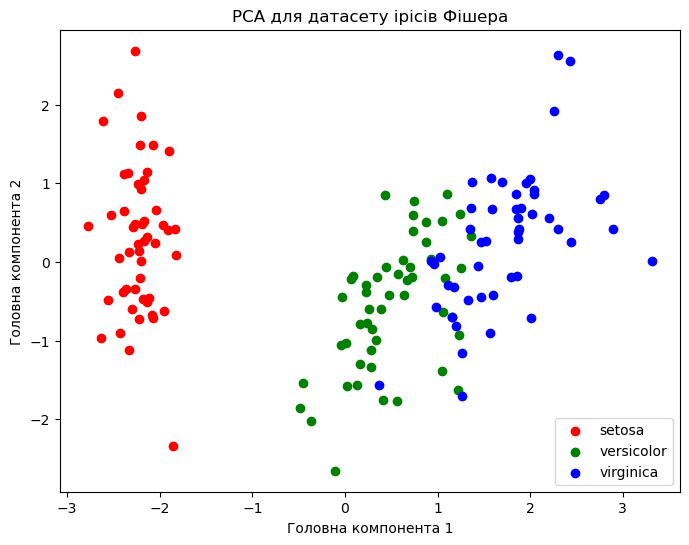

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 2
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(X_scaled)

print(f"Розмірність після PCA: {X_pca.shape[1]}")

print("Перші 5 прикладів з новими ознаками:")
print(X_pca[:5])

print("Внесок кожної головної компоненти у пояснення дисперсії:")
print(pca.explained_variance_ratio_)


colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 6))
for target, color in zip(range(3), colors):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], color=color, label=iris.target_names[target])

plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.title('PCA для датасету ірісів Фішера')
plt.legend()
plt.show()

In [11]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_components = 2
svd = TruncatedSVD(n_components=n_components)

X_svd = svd.fit_transform(X_scaled)

print(f"Розмірність після TruncatedSVD: {X_svd.shape[1]}")

print("Перші 5 прикладів з новими ознаками:")
print(X_svd[:5])

Розмірність після TruncatedSVD: 2
Перші 5 прикладів з новими ознаками:
[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


Розмірність після LDA: 2
Перші 5 прикладів з новими ознаками:
[[ 8.06179978  0.30042062]
 [ 7.12868772 -0.78666043]
 [ 7.48982797 -0.26538449]
 [ 6.81320057 -0.67063107]
 [ 8.13230933  0.51446253]]


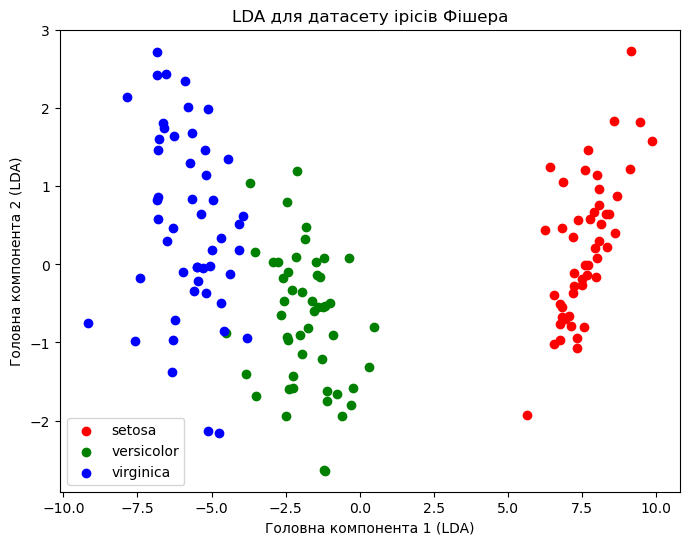

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)

X_lda = lda.fit_transform(X_scaled, y)

print(f"Розмірність після LDA: {X_lda.shape[1]}")

print("Перші 5 прикладів з новими ознаками:")
print(X_lda[:5])


colors = ['red', 'green', 'blue']

plt.figure(figsize=(8, 6))
for target, color in zip(range(3), colors):
    plt.scatter(X_lda[y == target, 0], X_lda[y == target, 1], color=color, label=iris.target_names[target])

plt.xlabel('Головна компонента 1 (LDA)')
plt.ylabel('Головна компонента 2 (LDA)')
plt.title('LDA для датасету ірісів Фішера')
plt.legend()
plt.show()